In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
bcd=datasets.load_breast_cancer()
x=bcd.data
y=bcd.target
x.shape

(569, 30)

In [4]:
bcd.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

C:\Users\Mehrafzar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[40,  3],
       [ 1, 70]], dtype=int64)

In [11]:
from sklearn.preprocessing import normalize

In [12]:
cm=normalize(cm,norm='l1',axis=1)

In [13]:
cm_df=pd.DataFrame(cm,columns=bcd.target_names,index=bcd.target_names)

In [14]:
cm_df

,malignant,benign
malignant,0.930233,0.069767
benign,0.014085,0.985915


In [15]:
from sklearn.metrics import roc_curve

In [18]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

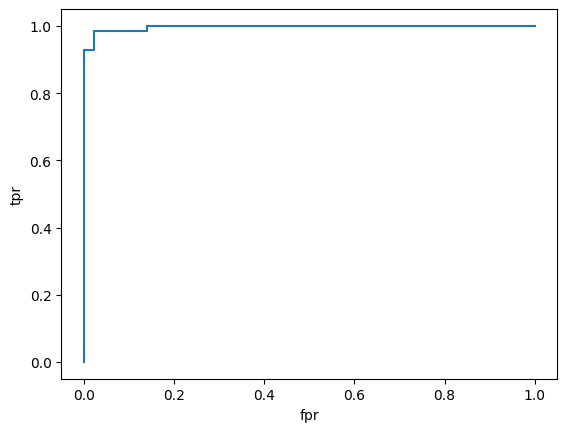

In [19]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
roc_auc_score(y_test,y_pred_prob)

0.9967245332459875

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
p_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,p_grid,cv=5)
knn_cv.fit(x,y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 13}
0.9332401800962584


In [26]:
from scipy.stats import randint

In [27]:
randint(1,9).rvs(3)

array([4, 3, 7], dtype=int64)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [29]:
params={'max_depth':[None,3],'max_features':randint(1,9),'min_samples_leaf':randint(1,9)}
tree=DecisionTreeClassifier()
tree_cv=RandomizedSearchCV(tree,params,cv=5)
tree_cv.fit(x_train,y_train)
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1}
0.9274725274725275


In [30]:
score=tree_cv.score(x_test,y_test)
score

0.9385964912280702